In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [55]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

In [34]:
catchment_name = 'LinDyke'
methods_key = 'Idealised'
# Set up ink to model directory and read in catchment shapefile
model_directory = "../{}Profiles/{}/".format(methods_key, catchment_name)
methods=methods_dict[methods_key]

361

### Get FEH profile

In [52]:
feh_profile = pd.read_csv("../FEHProfiles/{}/6hr_100yrRP_6.01h_1mintimestep.csv".format(catchment_name))

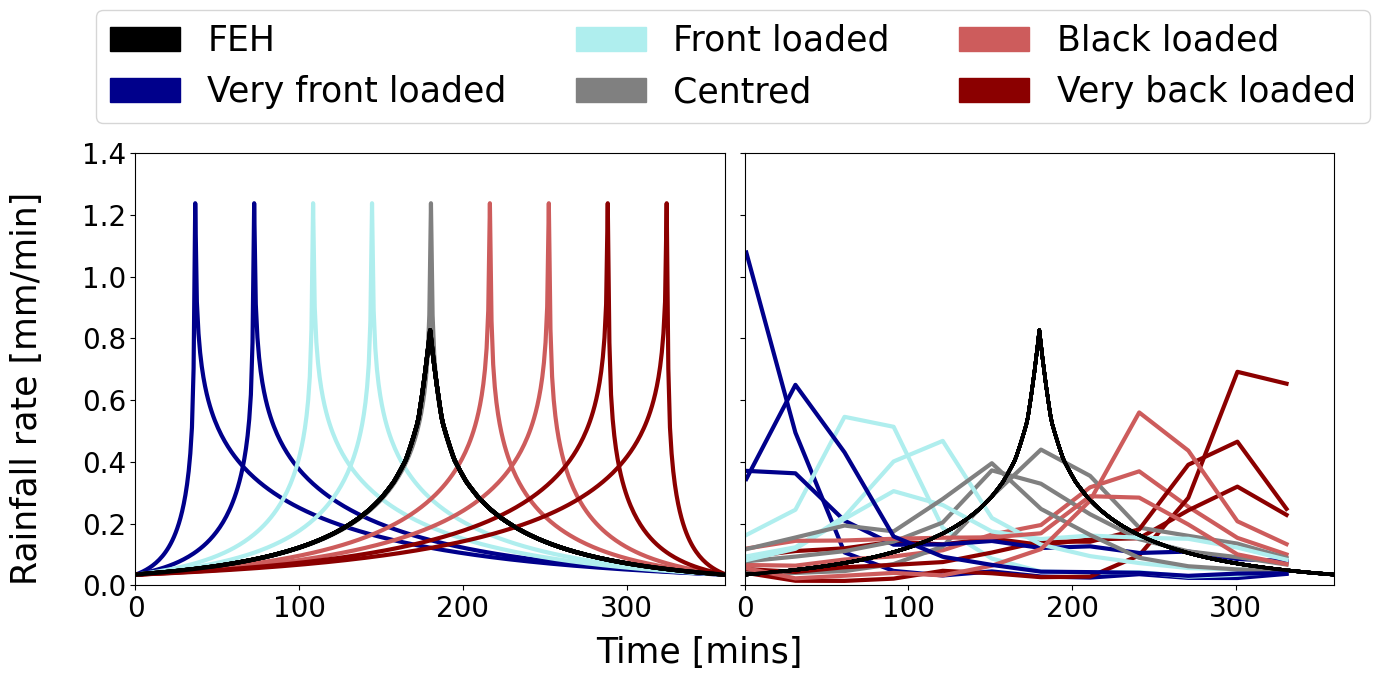

In [129]:
# Set up colours
colors_obs = ["darkblue","indianred","paleturquoise","darkred","darkred","grey","darkred","darkblue","grey","paleturquoise","paleturquoise","indianred","grey","indianred","darkblue"]
colors_idealised = ['darkblue']*2 + ['paleturquoise']*2 + ['grey']+ ['indianred']*2+['darkred']*2

# set up figure instance
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(13,5), sharey=True)

for axes_number, method in enumerate(methods_dict['Idealised']):
    # Read in data
    idealised_profile = pd.read_csv(model_directory + "6hr_100yrRP/PreLossRemoval/{}.csv".format(method), names = ['Time', 'Rainfall'])
    axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
    # Add FEh profile
    axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
            linestyle = 'solid') 
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    #axs[0].set_ylim(-0.05,1.35)  
    
for cluster_number in range(1,16):
    # Read in pre and post loss removal data
    observed_profile = pd.read_csv('../ObservedProfiles/{}/6hr_100yrRP/PreLossRemoval/cluster{}.csv'.format(catchment_name, cluster_number), names = ['Time', 'Rainfall'])
    test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})
    axs[1].plot(test['Minute'],test['Rainfall'], color=colors_obs[cluster_number-1], linewidth = 3)   
    #axs[1].set_ylim(-0.05,1.35)    
    axs[1].tick_params(axis='both', which='major', labelsize=20)
    
    # loop through tickers and axes
    axs[1].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=2.5, linestyle = 'solid')

fig.text(0.5, -0.05, 'Time [mins]', ha='center', fontsize = 25)
fig.text(-0.03, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 25)

fig.tight_layout() 

##############
# Create legend
##############
colors_leg = ['black', 'darkblue', 'paleturquoise','grey', 'indianred', 'darkred']
texts = ['FEH', 'Very front loaded','Front loaded','Centred', 'Black loaded', 'Very back loaded'] 
patches = [ mpatches.Patch(color=colors_leg[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(1.24, 0.5), loc='center', ncol=1, prop={'size': 15});
# plt.legend(handles=patches, bbox_to_anchor=(0.78, 0.79), loc='center', ncol=1, prop={'size': 13.5});
plt.legend(handles=patches, bbox_to_anchor=(-0.02, 1.20), loc='center', ncol=3, prop={'size': 25});

custom_xlim = (0, 360)
custom_ylim = (-0, 1.4)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

##############
# Save figure
##############
fig.savefig("../Figs/Idealised_Observed_Profiles_{}.png".format(catchment_name),bbox_inches='tight')   



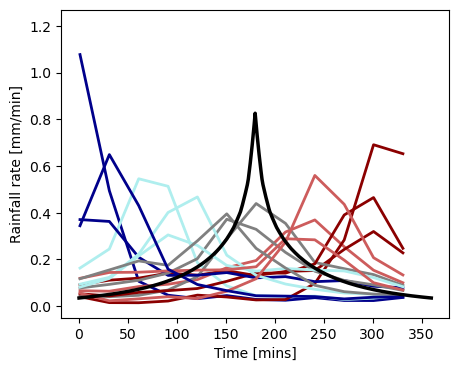

In [37]:


fig, ax = plt.subplots(figsize=(5,4))

for cluster_number in range(1,16):
    # Read in pre and post loss removal data
    pre_loss_removal = pd.read_csv('../ObservedProfiles/{}/6hr_100yrRP/PreLossRemoval/cluster{}.csv'.format(catchment_name, cluster_number), names = ['Time', 'Rainfall'])
    test = pd.DataFrame({'Rainfall':pre_loss_removal['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})
    
    #ax.plot(np.array(range(total_duration_minutes))+0.5,pre_loss_removal['Rainfall'], color=colors[cluster_number-1], linewidth = 2)   
    ax.plot(test['Minute'],test['Rainfall'], color=colors[cluster_number-1], linewidth = 2)   
    # ax.plot(np.array(range(len(pre_loss_removal['Rainfall'].unique()))),pre_loss_removal['Rainfall'].unique(), color=colors[cluster_number-1], linewidth = 2)   
    ax.set_xlabel('Time [mins]')
    ax.set_ylabel('Rainfall rate [mm/min]')
    ax.set_ylim(-0.05,1.27)
# loop through tickers and axes
ax.plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=2.5, linestyle = 'solid') 
 